In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Importing the data set using `numpy.load()` and exploring a bit

In [2]:
data = np.load('indianpinearray.npy')
data2 = np.load("IPgt.npy")

In [3]:
data.shape

(145, 145, 200)

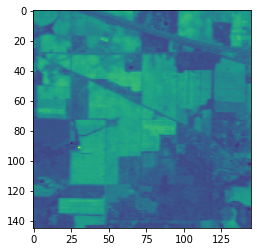

In [4]:
plt.imshow(data[:,:,140])
plt.savefig('single-band')

In [5]:
data2.shape

(145, 145)

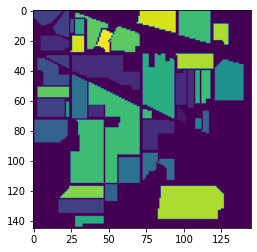

In [6]:
plt.imshow(data2)
plt.savefig('ground-truth')

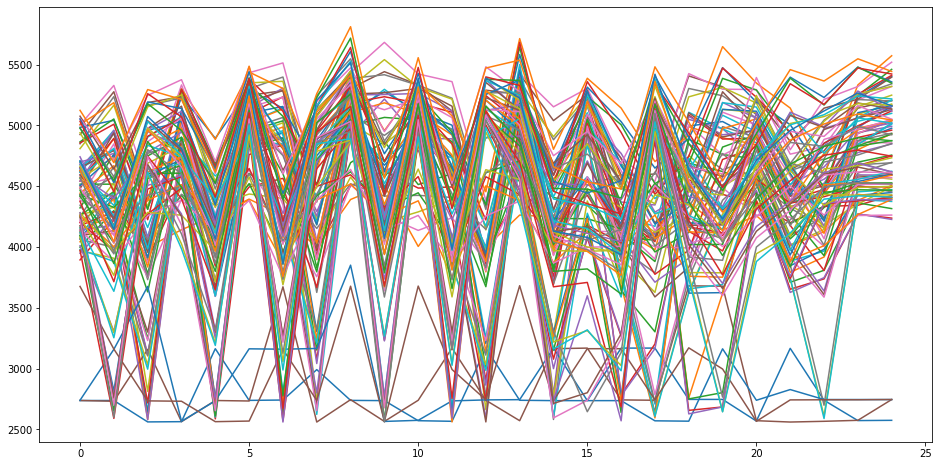

In [7]:
clusteringevidence, ax = plt.subplots(figsize=(16,8))
ax.plot(data[20:30,20:30,:25].reshape(25,-1))
plt.show()

In [8]:
clusteringevidence.savefig("clustering-evidence")

#### Now since there is some evidence of clustering, we can use PCA to simplify the data and check for clusters there.

First we scale the data for PCA

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
flat_points = data.reshape(-1,200)

In [16]:
flat_points

array([[3172, 4142, 4506, ..., 1057, 1020, 1020],
       [2580, 4266, 4502, ..., 1064, 1029, 1020],
       [3687, 4266, 4421, ..., 1061, 1030, 1016],
       ...,
       [3153, 3864, 4282, ..., 1003, 1008, 1000],
       [3155, 4104, 4106, ..., 1011, 1005, 1003],
       [3323, 3860, 4197, ..., 1007, 1004, 1000]], dtype=uint16)

In [17]:
scaled_flat = scaler.fit_transform(flat_points)

In [18]:
scaled_flat

array([[ 0.6047628 ,  0.21997468,  0.8862633 , ...,  1.28472014,
         0.38894136,  1.62910551],
       [-1.06326446,  0.75820528,  0.87074869, ...,  1.62021647,
         1.17937664,  1.62910551],
       [ 2.05583381,  0.75820528,  0.55657785, ...,  1.47643233,
         1.26720278,  1.06179023],
       ...,
       [ 0.55122814, -0.98670358,  0.01744517, ..., -1.30339441,
        -0.66497235, -1.20747086],
       [ 0.55686337,  0.05503305, -0.66519764, ..., -0.91997003,
        -0.92845077, -0.7819844 ],
       [ 1.03022246, -1.00406586, -0.31224028, ..., -1.11168222,
        -1.01627691, -1.20747086]])

In [19]:
scaled_flat.shape

(21025, 200)

In [21]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
x_pca = pca.fit_transform(scaled_flat)

In [25]:
x_pca.shape

(21025, 2)

Text(0.5, 1.0, 'First 10000 points after PCA')

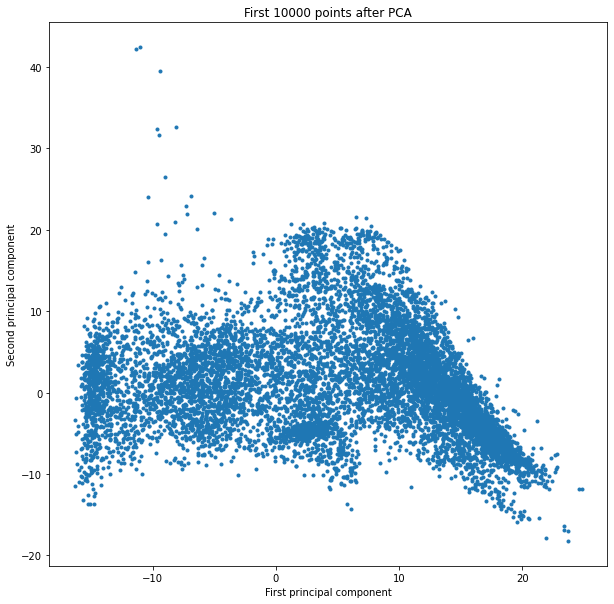

In [67]:
pcaplot, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=x_pca[:10000,0],y=x_pca[:10000,1],marker='.')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_title('First 10000 points after PCA')

In [68]:
pcaplot.savefig('pca-clusters')

The above plot shows some evidence of well defined clusters. We can try colouring them based on the gt to see if this method saves spatial integrity of the pixels

In [69]:
data2.shape

(145, 145)

In [83]:
list(set(data2.flatten()[:num].tolist()))

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16]

In [70]:
num = 10000
cl = data2.flatten()[:num].tolist()

Text(0.5, 1.0, 'First 10000 points after PCA, with ground truth mapping')

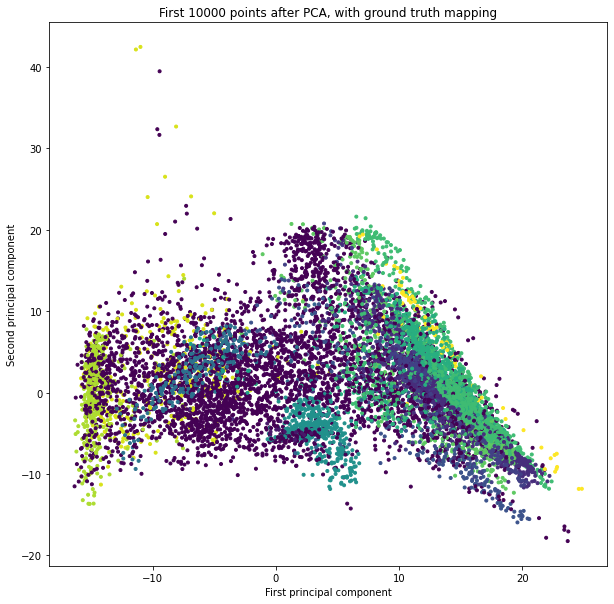

In [71]:
pcaplotc, ax = plt.subplots(figsize=(10,10))
ax.scatter(x=x_pca[:num,0],y=x_pca[:num,1],marker='.',c=cl)
ax.set_xlabel('First principal component')
ax.set_ylabel('Second principal component')
ax.set_title('First 10000 points after PCA, with ground truth mapping')

In [72]:
pcaplotc.savefig('pca-clusters-ground-truth')

In [75]:
import seaborn as sns

<AxesSubplot:>

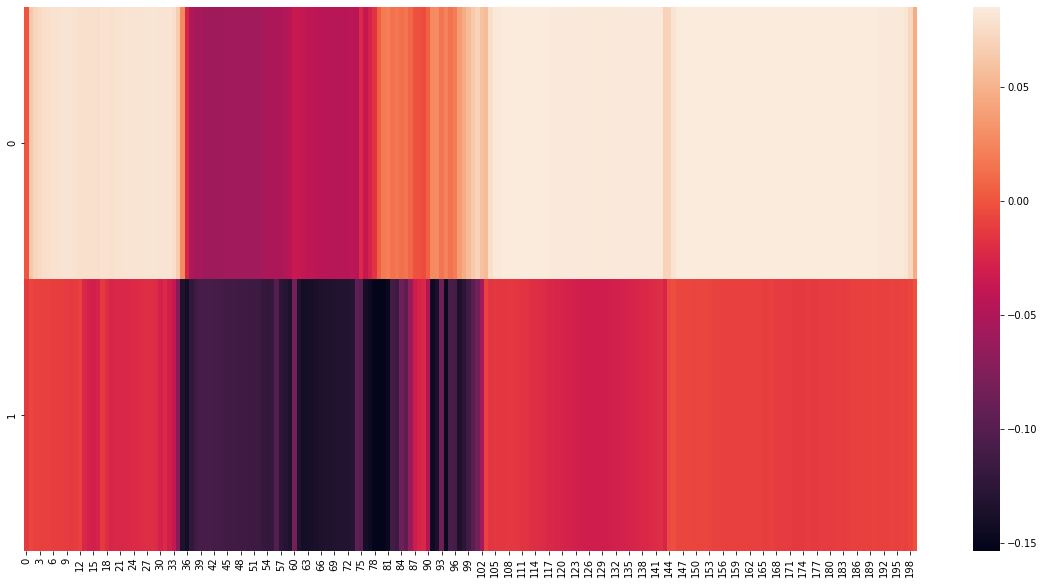

In [80]:
heatfig=plt.figure(figsize=(20,10))
sns.heatmap(pca.components_)

In [81]:
heatfig.savefig("principle-components-of-heatmap")

### Now we use KMeans for classifying the clusters.

In [82]:
from sklearn.cluster import KMeans

In [84]:
kmeans = KMeans(n_clusters=17)

In [85]:
kmeans.fit(x_pca)

KMeans(n_clusters=17)

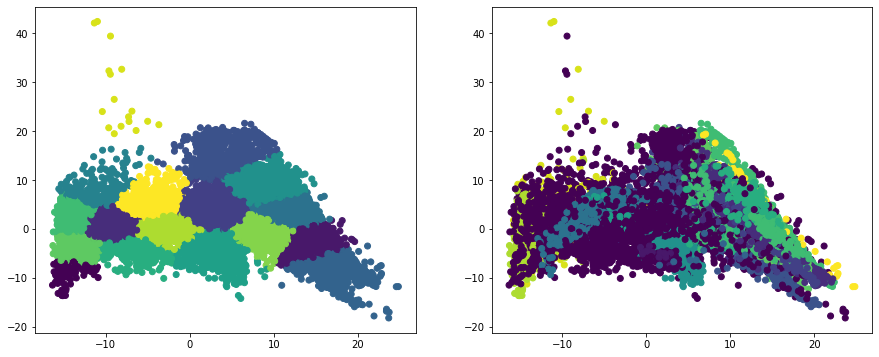

In [89]:
k_vs_gt, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
num = 10000
ax1.scatter(x_pca[:num,0],x_pca[:num,1],c=kmeans.labels_[:num])
ax2.scatter(x_pca[:num,0],x_pca[:num,1],c=data2.flatten()[:num])

### Trying Kmeans with all components

In [91]:
scaled_flat.shape

(21025, 200)

In [95]:
inertia_list = []

for k in range(1,30):
    print(k)
    kmodel = KMeans(n_clusters=k).fit(scaled_flat)
    inertia_list.append(kmodel.inertia_)
    del kmodel

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [93]:
inertia_list

[4204999.999999999,
 1846571.4357050196,
 1445039.4308805952,
 1199670.3447608517,
 1027373.7937610766,
 911463.1896828213,
 841941.6468175483,
 778390.2556862669,
 723765.0798963232,
 682189.9530906391,
 645990.9808331061,
 618940.4146174543,
 595310.9817649699,
 573343.3431657138,
 553754.3098841992,
 533633.9151088169,
 517394.67645081243,
 502989.1346649039,
 490120.70078627963,
 478047.9524984339]

Text(0, 0.5, 'Inertia')

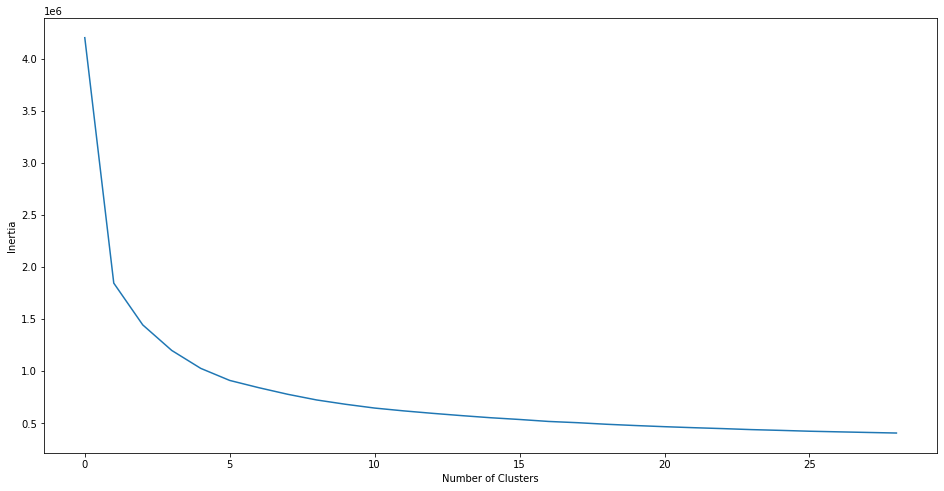

In [97]:
inertiafig, ax = plt.subplots(figsize=(16,8))
ax.plot(inertia_list)
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Inertia")

In [98]:
inertiafig.savefig("inertia")

kmodel = KMeans(n_clusters=17).fit(scaled_flat)

In [106]:
labels = np.array(kmodel.labels_)
pred = labels.reshape(145,145)

Text(0.5, 1.0, 'Clustered Pred')

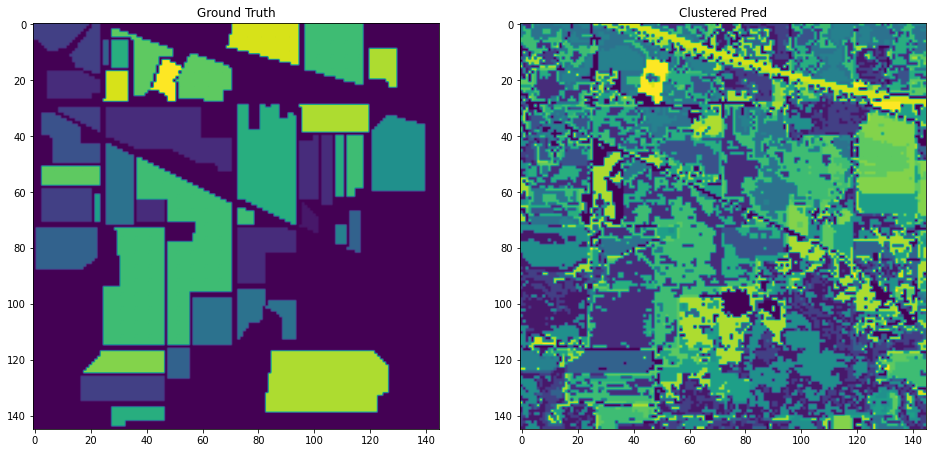

In [113]:
gtfig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.imshow(data2)
ax1.set_title("Ground Truth")
ax2.imshow(pred)
ax2.set_title("Clustered Pred")

In [114]:
gtfig.savefig("pure-clustering")

In [117]:
pca = PCA(n_components=100)
x_pca = pca.fit_transform(scaled_flat)
kmodel = KMeans(n_clusters=17).fit(x_pca)
labels = np.array(kmodel.labels_)
pred = labels.reshape(145,145)

Text(0.5, 1.0, 'Clustered Pred')

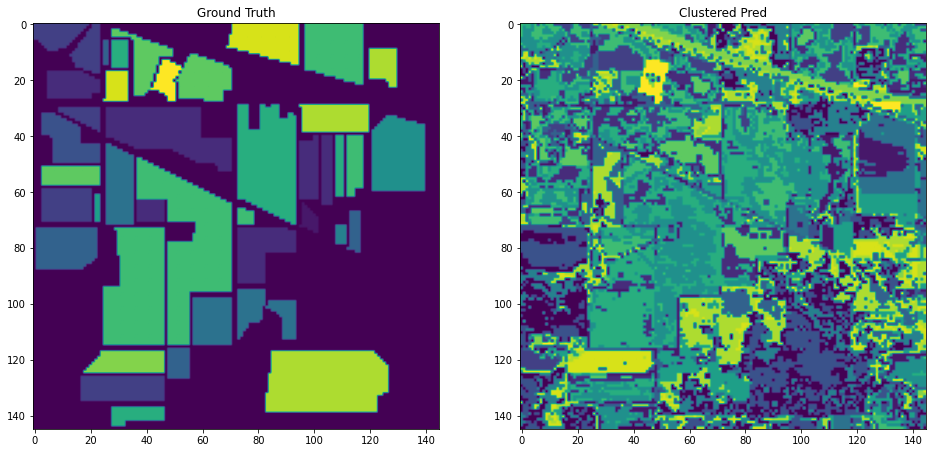

In [118]:
gtfig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.imshow(data2)
ax1.set_title("Ground Truth")
ax2.imshow(pred)
ax2.set_title("Clustered Pred")

In [119]:
pca = PCA(n_components=100)
x_pca = pca.fit_transform(scaled_flat)

In [122]:
x_pca.shape

(21025, 100)

In [126]:
x_pca_reshaped = x_pca.reshape(145,145,-1)
x_pix = np.zeros((145,145,102))
x_pix[:,:,2:] = x_pca_reshaped

In [128]:
for i in range(0,145):
    for j in range(0,145):
        x_pix[i,j,0] = i
        x_pix[i,j,1] = j

In [129]:
x_pix

array([[[ 0.00000000e+00,  0.00000000e+00,  1.05739847e+01, ...,
          1.37736581e-03,  1.58173071e-01, -1.23461127e-01],
        [ 0.00000000e+00,  1.00000000e+00,  1.31577074e+01, ...,
         -5.44811480e-02,  2.56176587e-02, -5.47385784e-02],
        [ 0.00000000e+00,  2.00000000e+00,  1.40703503e+01, ...,
         -8.91142274e-02,  4.79884366e-02, -2.69894198e-03],
        ...,
        [ 0.00000000e+00,  1.42000000e+02,  7.98010778e+00, ...,
          1.79230200e-01,  1.00946800e-01, -7.76428464e-02],
        [ 0.00000000e+00,  1.43000000e+02,  6.84005849e+00, ...,
         -6.54035709e-02,  1.35505257e-01,  1.03080170e-01],
        [ 0.00000000e+00,  1.44000000e+02,  6.99205037e+00, ...,
          3.61818660e-01,  9.50064656e-02,  8.54091920e-02]],

       [[ 1.00000000e+00,  0.00000000e+00,  9.69423628e+00, ...,
          6.78750548e-02, -2.77028431e-02,  4.23719059e-02],
        [ 1.00000000e+00,  1.00000000e+00,  1.20346250e+01, ...,
         -2.17609408e-02,  3.26350343e

In [131]:
kmodel = KMeans(n_clusters=17).fit(x_pix.reshape(-1,102))
labels = np.array(kmodel.labels_)
pred = labels.reshape(145,145)

Text(0.5, 1.0, 'Clustered Pred')

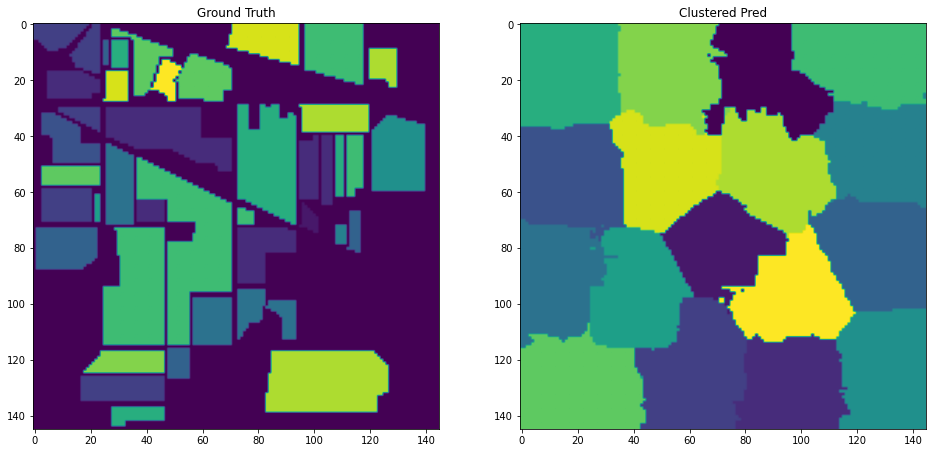

In [132]:
gtfig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.imshow(data2)
ax1.set_title("Ground Truth")
ax2.imshow(pred)
ax2.set_title("Clustered Pred")

In [138]:
x_pix = np.zeros((145,145,202))
x_pix[:,:,2:] = data

In [139]:
for i in range(0,145):
    for j in range(0,145):
        x_pix[i,j,0] = i
        x_pix[i,j,1] = j

In [142]:
del scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_pix.reshape(-1,202)).reshape(145,145,202)

In [144]:
kmodel = KMeans(n_clusters=17).fit(x_scaled.reshape(-1,202))
labels = np.array(kmodel.labels_)
pred = labels.reshape(145,145)

Text(0.5, 1.0, 'Clustered Pred')

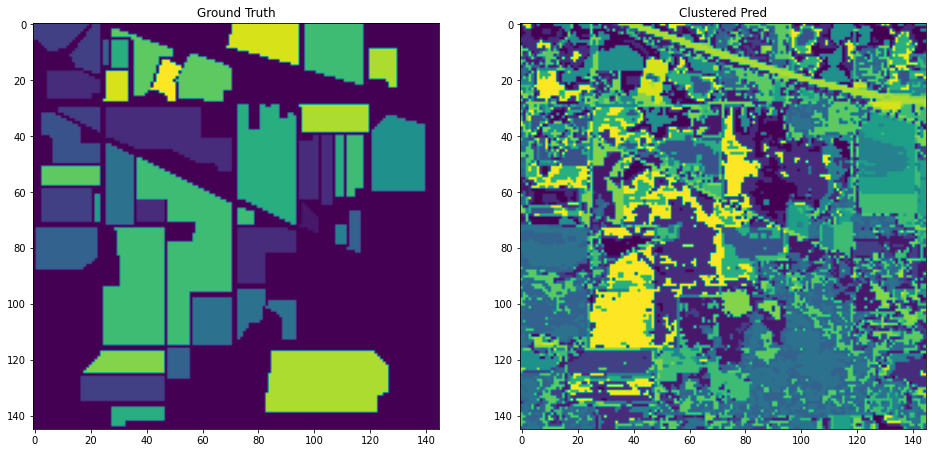

In [145]:
gtfig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.imshow(data2)
ax1.set_title("Ground Truth")
ax2.imshow(pred)
ax2.set_title("Clustered Pred")